In [1]:
import sys
sys.path.append('/usr/src/gym4real')  # <-- path to the *parent* of gym4real
import os
import gymnasium as gym
import onnxruntime as ort
import numpy as np
import matplotlib.pyplot as plt

import gym4real.envs.robofeeder as rf
from gym4real.algorithms.robofeeder import baseline

In [2]:
current_dir = os.path.dirname(rf.__file__)
# Load the object detection network
pretrained_ppo_dir = os.path.join(current_dir, "utils", "Pretrained/")

# Init the ONNX runtime session
providers = ['CUDAExecutionProvider','CPUExecutionProvider']
pretrained_agent = ort.InferenceSession(pretrained_ppo_dir + 'robofeeder-planning.onnx',providers=providers)
# baseline_agent = baseline.Baseline_picking()

# index dictionary for the action space
index_dict = {
     0:'First',
    1:'Second',
    2:'Third',
    3:'Reset',
}

/usr/local/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [3]:
env = gym.make('gym4real/robofeeder-planning', config_file=(current_dir + '/configuration.yaml'))
current_obs,_ = env.reset()

/usr/local/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [25]:
def printobs(env,title):
    plt.figure(figsize=(10, 5))
    for i in range(env.unwrapped.IMAGE_NUM):
        ax = plt.subplot(1, env.unwrapped.IMAGE_NUM, i + 1)
        ax.imshow(env.unwrapped.current_obs[i],cmap=plt.cm.gray)
        ax.title.set_text("Action "+str(i)+" - "+str(env.unwrapped.obsCenter[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title)
    plt.show()

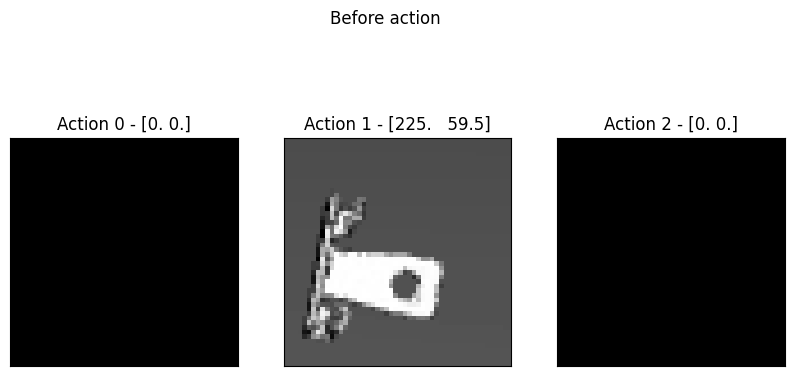

pretrained agent action
Object to pick: Second


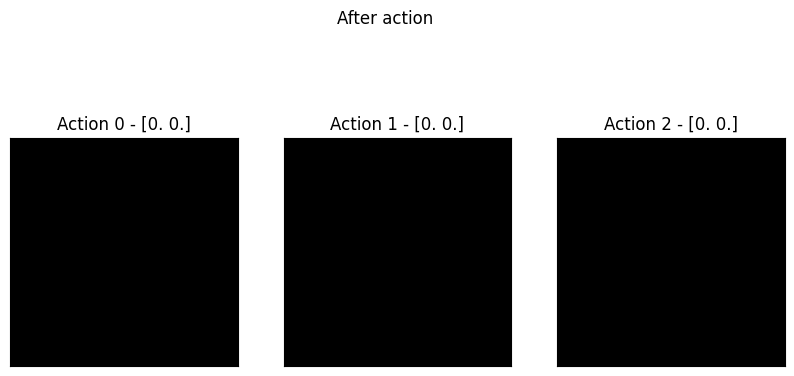

done: False
reward: 1 



In [41]:
# perform an action with pretrained agent   
# current_obs,_ = env.reset()
printobs(env,"Before action")
action = pretrained_agent.run(None, {"input": np.expand_dims(current_obs,axis=0)})[0][0]
print("pretrained agent action")
print(f"Object to pick: {index_dict[action]}")
current_obs,rew,done,_,_ = env.step(action)

printobs(env,"After action")

print("done:",done) 
print("reward:",rew,"\n")
if(done): env.reset()

In [42]:
baseline_agent = baseline.Baseline_planning(env.action_space)

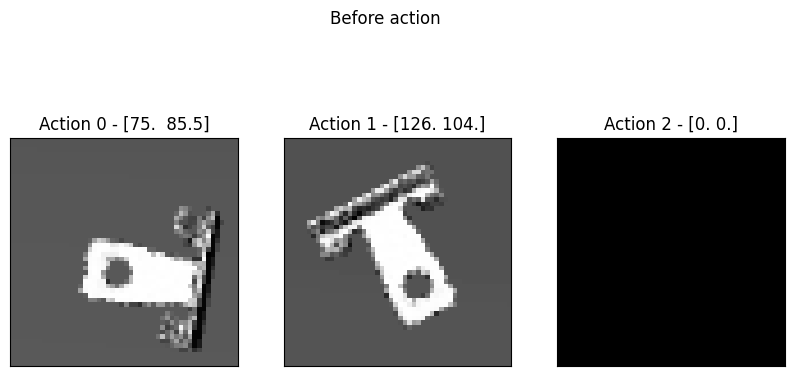

pretrained agent action
Object to pick: Third


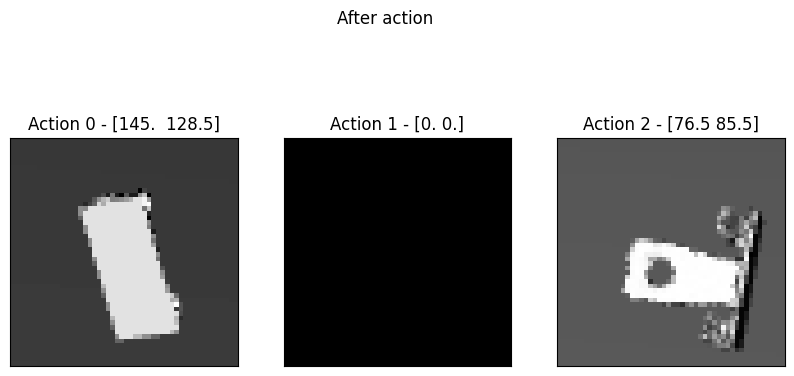

done: False
reward: -1 



In [54]:
# perform an action with baseline agent   

# perform an action with pretrained agent   
# current_obs,_ = env.reset()
printobs(env,"Before action")
action = baseline_agent.act()
print("pretrained agent action")
print(f"Object to pick: {index_dict[action]}")
current_obs,rew,done,_,_ = env.step(action)

printobs(env,"After action")

print("done:",done) 
print("reward:",rew,"\n")
if(done): env.reset()

In [52]:
np.random.choice(np.arange(env.action_space.n), size=1)[0]

np.int64(3)